In [360]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

In [361]:
path = "../HW4/"

In [362]:
# I WANT: (NK, ZKC, ZKW) -> NK = ([confs], [times], [results], [deviations]) -> times = [instanceSizes] -> instanceSize = [int]


def dataOfAlgo(algoName):
  algoNK = dataOfFile(path + algoName)
  return (algoNK, )

def dataOfFile(filename):
  lines = ''.join(readFile(filename))
  segments = lines.split("=")
  confs = segmentToValues(segments[0])
  times = segmentToValues(segments[1])
  results = segmentToValues(segments[2])
  return (confs, times, results)

def segmentToValues(segment):
  instanceSizes = segment.split("\n")
  result = []
  for i in instanceSizes:
    if(len(i) > 1):
      values = list(map(int, i.split(" ")))
      result.append(values)
  return result

def segmentToStates(line):
  return list(map(int, line.split(" ")))

def readFile(filename):
  with open(path + filename) as f:
    lines = f.readlines()
    return lines
    

In [363]:
cool8 = segmentToStates(readFile(path + "cool-8")[0])
cool9 = segmentToStates(readFile(path + "cool-9")[0])
cool95 = segmentToStates(readFile(path + "cool-95")[0])
cool99 = segmentToStates(readFile(path + "cool-99")[0])
cool999 = segmentToStates(readFile(path + "cool-999")[0])

freeze1 = segmentToStates(readFile(path + "freeze-1")[0])
freeze5 = segmentToStates(readFile(path + "freeze-5")[0])
freeze10 = segmentToStates(readFile(path + "freeze-10")[0])
freeze25 = segmentToStates(readFile(path + "freeze-25")[0])
freeze50 = segmentToStates(readFile(path + "freeze-50")[0])
freeze100 = segmentToStates(readFile(path + "freeze-100")[0])
freeze500 = segmentToStates(readFile(path + "freeze-500")[0])
freeze1000 = segmentToStates(readFile(path + "freeze-1000")[0])

bb = dataOfAlgo("BranchBound")
dp = dataOfAlgo("DynamicProgrammingPrice")
sa95 = dataOfAlgo("SimulatedAnnealing")
sa9 = dataOfAlgo("SimulatedAnnealing-9")
sa8 = dataOfAlgo("SimulatedAnnealing-8")
gr = dataOfAlgo("GreedyRedux")

instSizes = [4, 10, 15, 20, 22, 25, 27, 30, 32, 35, 37, 40]

In [364]:
def deviation(value1, value2):
  return abs(value1 - value2) / max(value1, value2, 1)

def avg(data):
  return sum(data) / len(data)

def getDeviationsPSet(data, optData):
  resultsData = data[2]
  resultsOData = optData[2]

  deviations = []
  for i,f in enumerate(resultsData):
    fDeviations = []
    for j,r in enumerate(f):
      devi = deviation(resultsData[i][j], resultsOData[i][j])
      fDeviations.append(devi)
    deviations.append(fDeviations)
  return deviations

def getDevs(data, optData):
  dnk = getDeviationsPSet(data[0], optData[0])
  return (dnk, )

def getMaxsPSet(data):
  maxs = []
  for f in data:
    maxs.append(max(f))
  return maxs

def getAvgsPSet(data):
  maxs = []
  for f in data:
    maxs.append(avg(f))
  return maxs

def getMaxs(data):
  mnk = getMaxsPSet(data[0][1])
  return (mnk, )

def getAvgs(data):
  mnk = getAvgsPSet(data[0][1])
  return (mnk, )

def getMaxDevs(data, oData):
  values = getDevs(data, oData)
  mnk = getMaxsPSet(values[0])
  return (mnk, )

def getAvgDevs(data, oData=dp):
  values = getDevs(data, oData)
  mnk = getAvgsPSet(values[0])
  return (mnk, )

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při ochlazování = 0.8')

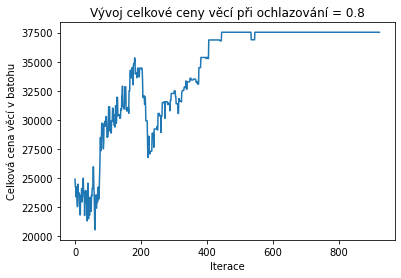

In [365]:
plt.plot(range(0, len(cool8)), cool8)
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při ochlazování = 0.8')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při ochlazování = 0.9')

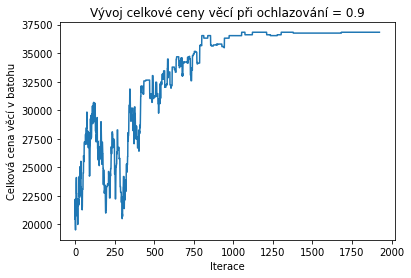

In [366]:
plt.plot(range(0, len(cool9)), cool9)
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při ochlazování = 0.9')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při ochlazování = 0.95')

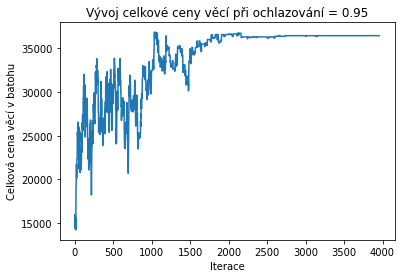

In [367]:
plt.plot(range(0, len(cool95)), cool95)
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při ochlazování = 0.95')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při ochlazování = 0.99')

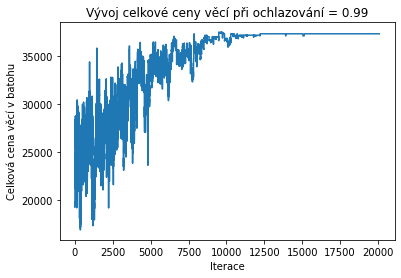

In [368]:
plt.plot(range(0, len(cool99)), cool99)
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při ochlazování = 0.99')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při ochlazování = 0.999')

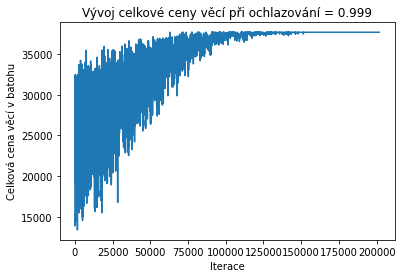

In [369]:
plt.plot(range(0, len(cool999)), cool999)
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při ochlazování = 0.999')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při freeze = 1')

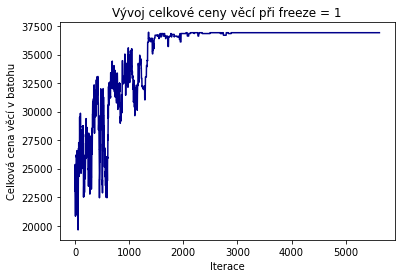

In [370]:
plt.plot(range(0, len(freeze1)), freeze1, "darkblue")
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při freeze = 1')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při freeze = 5')

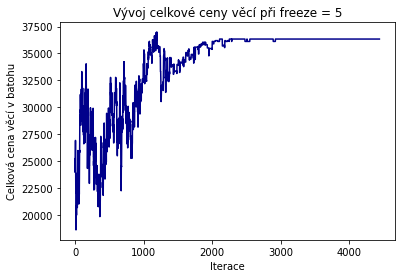

In [371]:
plt.plot(range(0, len(freeze5)), freeze5, "darkblue")
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při freeze = 5')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při freeze = 10')

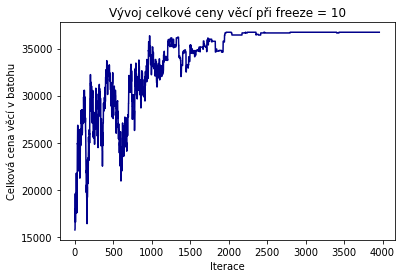

In [372]:
plt.plot(range(0, len(freeze10)), freeze10, "darkblue")
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při freeze = 10')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při freeze = 25')

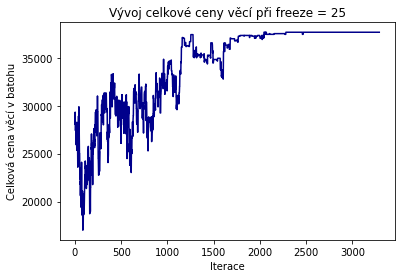

In [373]:
plt.plot(range(0, len(freeze25)), freeze25, "darkblue")
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při freeze = 25')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při freeze = 50')

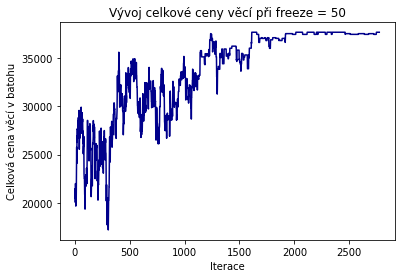

In [374]:
plt.plot(range(0, len(freeze50)), freeze50, "darkblue")
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při freeze = 50')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při freeze = 100')

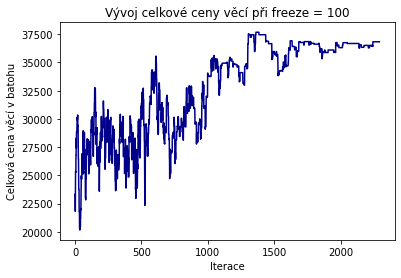

In [375]:
plt.plot(range(0, len(freeze100)), freeze100, "darkblue")
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při freeze = 100')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při freeze = 500')

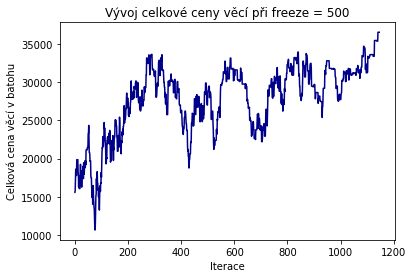

In [376]:
plt.plot(range(0, len(freeze500)), freeze500, "darkblue")
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při freeze = 500')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při freeze = 1000')

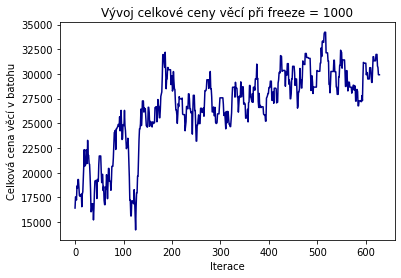

In [377]:
plt.plot(range(0, len(freeze1000)), freeze1000, "darkblue")
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při freeze = 1000')

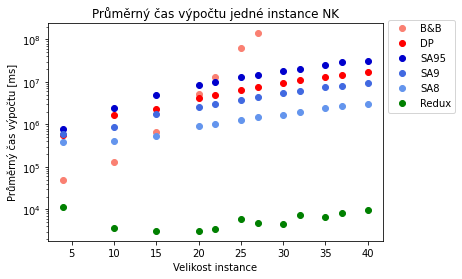

In [378]:
plt.plot(instSizes[:len(bb[0][1])], getAvgs(bb)[0], 'o', label="B&B", color="salmon")
plt.plot(instSizes[:len(dp[0][1])], getAvgs(dp)[0], 'o', label="DP", color="red")
plt.plot(instSizes[:len(sa95[0][1])], getAvgs(sa95)[0], 'o', label="SA95", color="mediumblue")
plt.plot(instSizes[:len(sa9[0][1])], getAvgs(sa9)[0], 'o', label="SA9", color="royalblue")
plt.plot(instSizes[:len(sa8[0][1])], getAvgs(sa8)[0], 'o', label="SA8", color="cornflowerblue")
plt.plot(instSizes[:len(gr[0][1])], getAvgs(gr)[0], 'o', label="Redux", color="green")
plt.yscale("log")
plt.xlabel("Velikost instance")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Průměrný čas výpočtu jedné instance')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

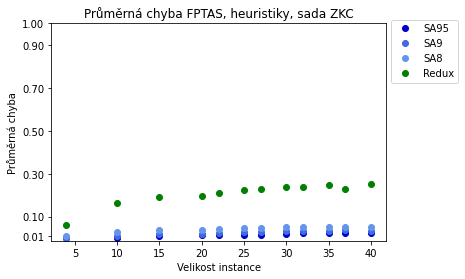

In [379]:
plt.plot(instSizes[:len(sa95[0][1])], getAvgDevs(sa95)[0], 'o', label="SA95", color="mediumblue")
plt.plot(instSizes[:len(sa9[0][1])], getAvgDevs(sa9)[0], 'o', label="SA9", color="royalblue")
plt.plot(instSizes[:len(sa8[0][1])], getAvgDevs(sa8)[0], 'o', label="SA8", color="cornflowerblue")
plt.plot(instSizes[:len(gr[0][1])], getAvgDevs(gr)[0], 'o', label="Redux", color="green")
plt.yticks([1, 0.9, 0.7, 0.5, 0.3, 0.1, 0.01])
plt.xlabel("Velikost instance")
plt.ylabel("Průměrná chyba")
plt.title('Průměrná chyba heuristik')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')